In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from luwiji.dimensionality_reduction import illustration

In [3]:
df = pd.read_csv('data/data/lfw_people.csv')
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe


# Dataset splitting

In [6]:
X = df.drop(columns="name").values
y = df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

# Visualize Data

(-0.5, 64.5, 86.5, -0.5)

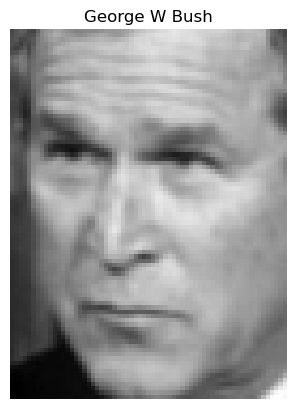

In [7]:
idx = 2
plt.imshow(X_train[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

# Decide n_components

Text(0, 0.5, 'cumulative explained varience')

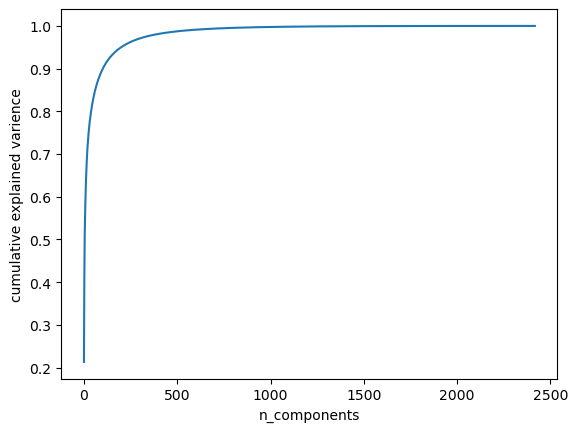

In [8]:
pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('cumulative explained varience')

# Feature Extraction melalui Dim reduction

In [9]:
pca = PCA(250, whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
print(X_train.shape) # hidden layer
print(X_train_pca.shape) # weight / code
print(pca.components_.shape) # fitur

(2418, 5655)
(2418, 250)
(250, 5655)


# Coba visualisasi fitur(component) nya

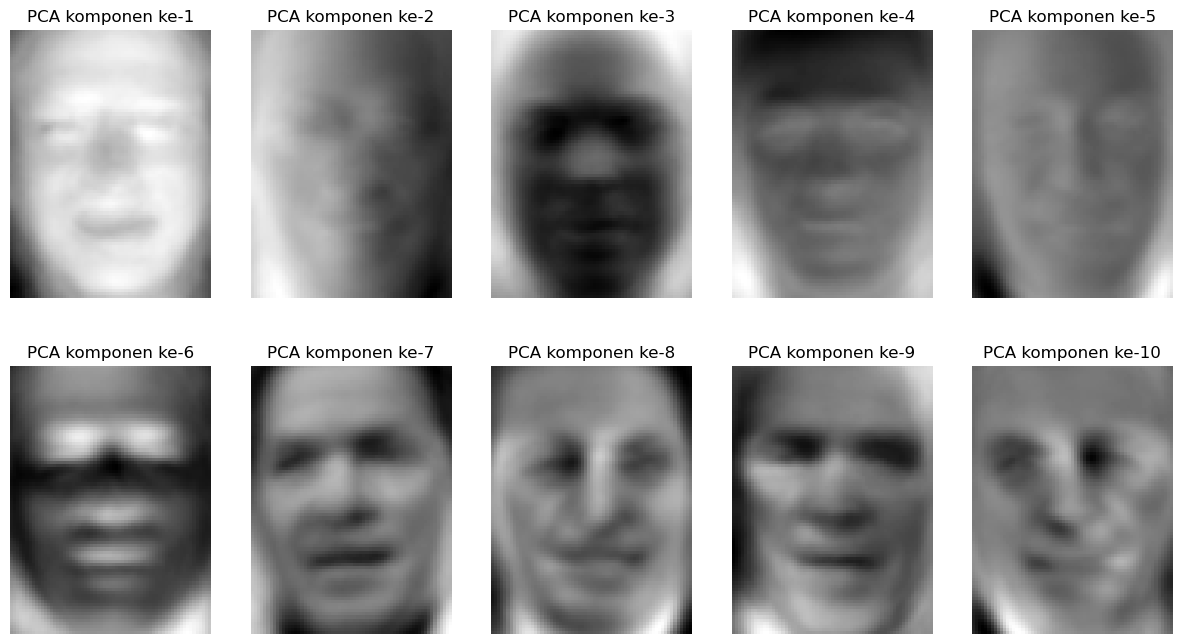

In [13]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f'PCA komponen ke-{i+1}')
    plt.axis('off')

# Reconstruct Image

In [14]:
X_train_inverse = pca.inverse_transform(X_train_pca)

(-0.5, 64.5, 86.5, -0.5)

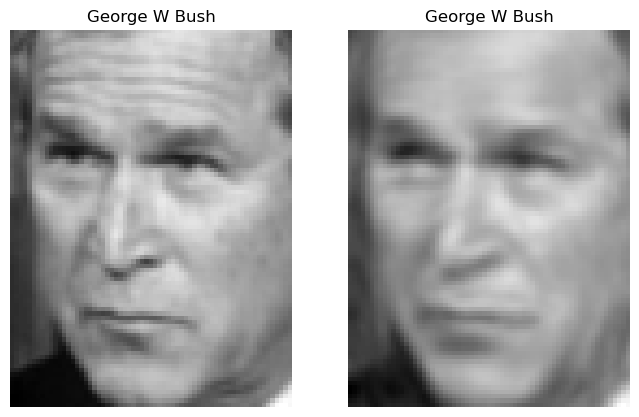

In [19]:
plt.figure(figsize=(8,5))
idx = 2

plt.subplot(121)
plt.imshow(X_train[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

plt.subplot(122)
plt.imshow(X_train_inverse[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

# Rekonstruksi PCA itu kombinasi linear dari komponennya

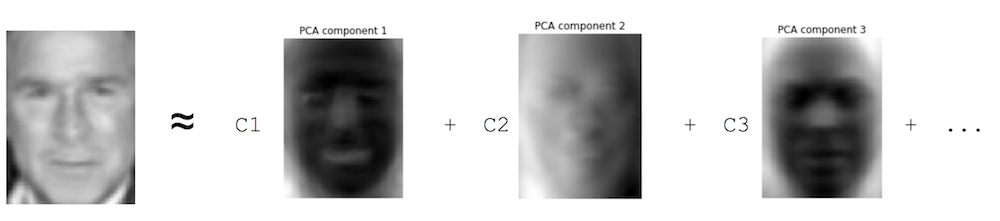

In [20]:
illustration.pca_combination

# Artinya apa? Kita bisa encode wajah orang -> Face verification

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
soekarno1 = plt.imread('data/data/sample_faces/soekarno1.png').reshape(1, -1)
soekarno2 = plt.imread('data/data/sample_faces/soekarno2.png').reshape(1, -1)
hatta = plt.imread('data/data/sample_faces/hatta.png').reshape(1, -1)

In [23]:
pca.transform(soekarno1).shape

(1, 250)

In [24]:
s1 = pca.transform(soekarno1)
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [25]:
cosine_similarity(s1, s2)

array([[0.99982179]])

In [26]:
cosine_similarity(s1, h1)

array([[0.99976969]])

## mencari wajah yang paling mirip dengan soekarno

In [28]:
sim = cosine_similarity(s1, X_train_pca)

sim.argsort()

array([[1092,  955,  840, ..., 2233, 2262, 1987]], dtype=int64)

(-0.5, 64.5, 86.5, -0.5)

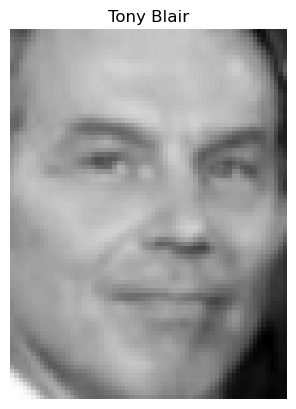

In [29]:
idx = 1092

plt.imshow(X_train[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

# Other alternative -> Non-Negative Matrix Factorization

Selain SVD, terdapat metode faktorisasi lain yang disebut NMF.
Dulu dikenal sebagai Positive Matrix Factorization, tapi sekarang lebih dikenal sebagai Non-Negative Matrix Factorization (NMF atau NNMF).
SVD mencari orthogonal dengan menggunakan kombinasi linear dari fitur sedangkan NNMF memaksa nilainya untuk tidak negatif. Kelebihan NMF:

- nilai yang positif (cocok untuk image)
- komponen yang dihasilkan biasanya lebih mudah diinterpretasi (karena semua positif, menghindari nilai yang canceling)

c:\Users\akmal\anaconda3\envs\jcopdl\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


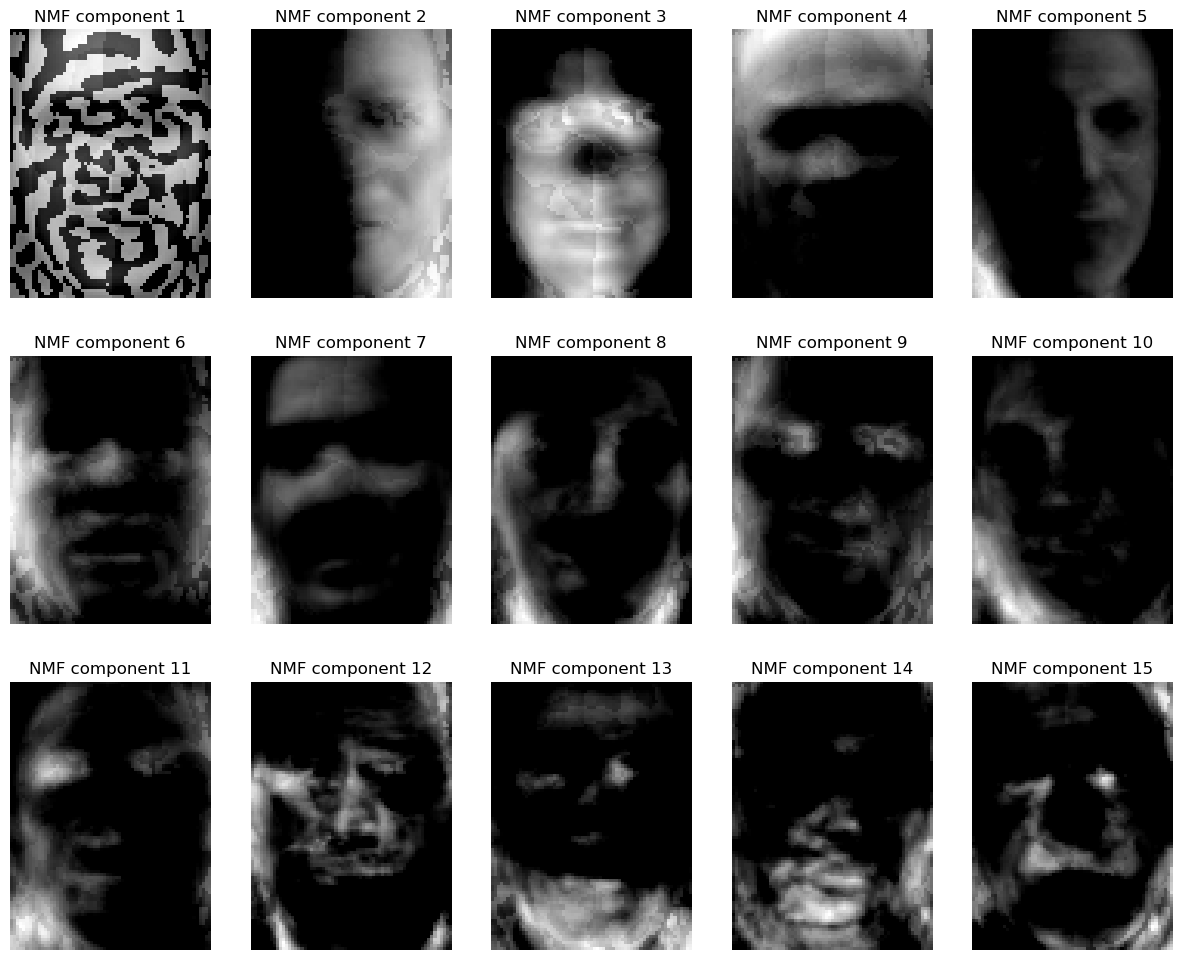

In [39]:
nmf = NMF(250, max_iter=500, tol=1e-4)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

plt.figure(figsize=(15, 12))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(nmf.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f"NMF component {i+1}")
    plt.axis('off')


In [40]:
soekarno1 = soekarno1.astype(np.float64)
soekarno2 = soekarno2.astype(np.float64)
hatta = hatta.astype(np.float64)

s1 = nmf.transform(soekarno1)
s2 = nmf.transform(soekarno2)
h1 = nmf.transform(hatta)

In [41]:
cosine_similarity(s1, s2)

array([[0.5274592]])

In [42]:
cosine_similarity(s1, h1)

array([[0.33992468]])